# Schnitzeljagd im Goerli

The challenge description mentions a address `0x60B268593E71E3ADa6Dc33982d9b2bEBB38C65C1`, and something about the Goerli. Of course we immediately recognize this a Ethereum address. But wait, https://etherscan.io doesn't show anything :-( - unless we switch to the Goerli testnetwork :-)

In [1]:
import math, random
import networkx as nx
import matplotlib.pyplot as plt
import os
from web3 import Web3

%matplotlib inline

The challenge looks like a cascade of transactions, starting from a root transaction. Let's try to reconstruct this transaction tree!
We can use any service that allows us to fetch some basic information about the blocks, i.e. the transactions. We could either self-host (geth) or something hosted such as infura

In [2]:
URL = f"https://goerli.infura.io/v3/{os.getenv('API_KEY')}"
web3 = Web3(Web3.HTTPProvider(URL))

We do some basic bounds estimation - all the transactions seem to be in a range of perhaps 7-10 blocks, starting from 7867996.

In [3]:
block_range = range(7867996, 7868007)
blocks = list(map(lambda blocknum: web3.eth.get_block(blocknum, full_transactions=True), block_range))

We reconstruct the graph using the infamous networkx library and limit ourselves to transactions originating from the `0x60B268593E71E3ADa6Dc33982d9b2bEBB38C65C1` account.

In [4]:
G = nx.Graph()
for block in blocks:
    for txn in block.transactions:
        if txn['from'] and txn['to']:
            G.add_edge(txn['from'], txn['to'], data = txn['input'])

In [5]:
T = nx.dfs_tree(G, "0x60B268593E71E3ADa6Dc33982d9b2bEBB38C65C1")

Let's draw the tree for some basic sanity checking.

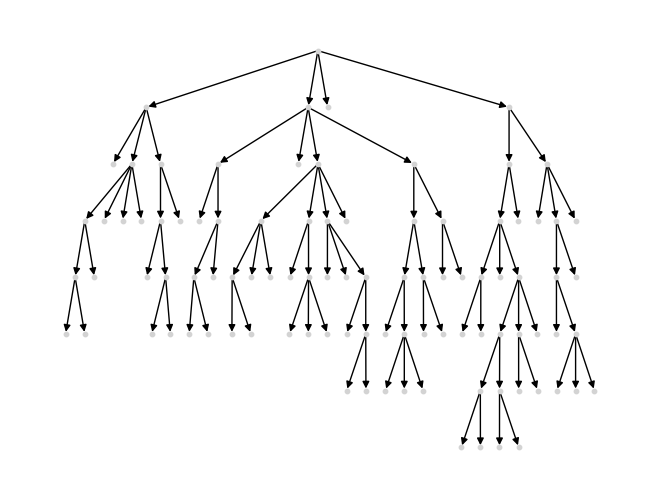

In [6]:
nx.draw(T, pos=nx.nx_agraph.graphviz_layout(T, prog="dot"), with_labels=False, node_size=10, node_color="lightgray")

Now we enumerate all the edges (== transactions), in a Breath-First-Order with the `bfs-edges()` function

In [7]:
edges = list(nx.bfs_edges(T, "0x60B268593E71E3ADa6Dc33982d9b2bEBB38C65C1"))

Decode the call data and filter out the artifacts ("NIETE")

In [8]:
flag = ""
for u,v in edges:
    data = G.edges[(u,v)]["data"]
    if data != "0x" and data != "0x4e49455445":
        flag += bytes.fromhex(data[2:]).decode("utf-8")

display(flag)

'https://www.youtube.com/watch?v=dQw4w9WgXcQnland{h4ppy_tree_friend}'

Flag is `nland{h4ppy_tree_friend}`